<a href="https://colab.research.google.com/github/ChiefRz/Exploratory_Data_Analysis_on_the_Online_Retail_dataset/blob/main/Exploratory_Data_Analysis_on_the_Online_Retail_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis on the Online Retail dataset

**Author :** Rheyza Avta Naufaldy

**Dataset Link :** https://archive.ics.uci.edu/dataset/352/online+retail

In the competitive retail industry, understanding customer purchasing patterns and product efficiency is crucial. This project conducts an in-depth Exploratory Data Analysis (EDA) on the Online Retail dataset to evaluate which areas drive profit and which areas cause losses.

**Dataset Description**

This Dataset is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Feature :**
1. Description (categorical): The name of product  
2. Quantity (integer): The quantities of each product per transaction   
3. InvoiceDate (Date):	The day and time when each transaction was generated
4. UnitPrice	(Continuous):	They product price per unit	sterling
5. CustomerID	(Categorical):	A 5-digit integral number uniquely assigned to each customer
6. Country	(Categorical):	The name of the country where each customer resides

**Business Questions**
1. Which product has highest sales volume, and does that product also generate the highest profit?
2. What are the trend in monthly? Are there any spesific seaseonal pattern that need to be anticipated for stock planning ?
3. Which region has the worst performance and requires special attention ?

## Import Library

In [1]:
!pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

## Data Wrangling

### Data Gathering

In [3]:
# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
online_retail_df = online_retail.data.features
online_retail_df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Asessing Data

#### Check Data Summary

In [4]:
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [5]:
online_retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Insight:**

*   **The 'CostumerID' column only has 406,829 entries**. This means that 135,080 transactions (about 25%) don't have a Costumer ID. These transactions are likely from Guest Checkout (purchases without logging in)
*   **The 'Descriptions' column only has 540,455 entries**. This means that 1,454 transactions don't have a product name. These transactions requires further verification
*   **There are items with extreme price value (38.970) in the 'UnitPrice' column**. These transactions requires further verification
*   **The Minimum Value in the 'UnitPrice' column is negative.** The selling price is unlikely to be negative. These transactions requires further verification

*   **The 'InvoiceDate' column still has a object datatype**.
*   **The 'CostumerID' column has a float datatype**. The CostumerID column must be in categorical datatype
*   **The 'Quantity' column have extreme maximum and minimum values**. These transactions requires further verification









#### Check Unique Values

In [6]:
for col in online_retail_df.select_dtypes(include=['object']).columns:
    print(online_retail_df[col].value_counts(dropna=False))
    print("-" * 20)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
dotcom adjust                            1
LARGE HEART FLOWERS HOOK                 1
SET 10 CARDS SNOWY ROBIN 17099           1
POLYESTER FILLER PAD 60x40cm             1
mailout                                  1
Name: count, Length: 4224, dtype: int64
--------------------
InvoiceDate
10/31/2011 14:41    1114
12/8/2011 9:28       749
12/9/2011 10:03      731
12/5/2011 17:24      721
6/29/2011 15:58      705
                    ... 
10/27/2011 10:58       1
10/27/2011 12:57       1
10/27/2011 12:13       1
12/9/2011 11:57        1
12/9/2011 11:50        1
Name: count, Length: 23260, dtype: int64
--------------------
Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE

In [7]:
non_uppercase_descriptions = online_retail_df[online_retail_df['Description'].notna() &
                                             ~online_retail_df['Description'].apply(lambda x: str(x).isupper())]

unique_non_uppercase_descriptions = non_uppercase_descriptions['Description'].unique()

print("Unique values in 'Description' that are not all uppercase:")
for desc in unique_non_uppercase_descriptions:
    print(desc)

Unique values in 'Description' that are not all uppercase:
Discount
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
BAG 125g SWIRLY MARBLES
BAG 250g SWIRLY MARBLES
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
Manual
Dr. Jam's Arouzer Stress Ball
3 TRADITIONAl BISCUIT CUTTERS  SET
Bank Charges
NUMBER TILE COTTAGE GARDEN No
amazon
FOLK ART GREETING CARD,pack/12
?
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
check
damages
Dad's Cab Electronic Meter
NUMBER TILE VINTAGE FONT No 
*Boombox Ipod Classic
faulty
Dotcom sales
amazon sales
*USB Office Mirror Ball
POLYESTER FILLER PAD 30CMx30CM
Dotcomgiftshop Gift Voucher £40.00
Found
Dotcomgiftshop Gift Voucher £50.00
reverse 21/5/10 adjustment
Dotcomgiftshop Gift Voucher £30.00
Dotcomgiftshop Gift Voucher £20.00
mouldy, thrown away.
found
counted
Given away
Dotcom
label mix up
samples/damages
thrown away
incorrectly made-thrown away.
showroom
Adjustment
Dotcomgiftshop Gift Vou

**Insight:**
*   There are non-product entries such as 'dotcom adjust' that need to be cleaneditem.
*   The UK market accounts for over 90% of total transactions. This data is heavily imbalanced.
*   Many rows are not sales transactions, but rather warehouse staff notes about the condition of the goods.








#### Check Missing Values

In [8]:
online_retail_df.isnull().sum()

,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


**Insight:**


*   There are 1,454 missing values in the 'Description' column
*   There are 135,080 missing values in the 'CostumerID' column



#### Check Duplicated Data

In [9]:
online_retail_df.duplicated().sum()

np.int64(6007)

**Insight:**


*   There are 6007 duplicated data

#### Check Outliers

In [10]:
numerical_columns = [x for x in online_retail_df.select_dtypes(include='number').columns if x not in ['CustomerID']]
numerical_columns

['Quantity', 'UnitPrice']

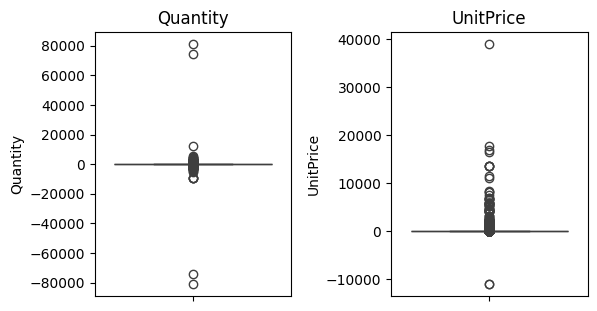

In [11]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=online_retail_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Insight:**
*   Quantity Symmetry (+/- 80,000). Indicates the presence of order cancellations in large quantities.
*   A negative price was found. which is invalid data for sales analysis.




### Cleaning Data

#### Handling Duplicated Data

In [12]:
online_retail_df.drop_duplicates(inplace=True)
online_retail_df.duplicated().sum()

/tmp/ipython-input-2932223813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail_df.drop_duplicates(inplace=True)


np.int64(0)

#### Data Type Conversion

1. 'InvoiceDate' column

In [13]:
online_retail_df['InvoiceDate'] = pd.to_datetime(online_retail_df['InvoiceDate'])
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535902 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Description  534532 non-null  object        
 1   Quantity     535902 non-null  int64         
 2   InvoiceDate  535902 non-null  datetime64[ns]
 3   UnitPrice    535902 non-null  float64       
 4   CustomerID   401528 non-null  float64       
 5   Country      535902 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 28.6+ MB


/tmp/ipython-input-2656074615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail_df['InvoiceDate'] = pd.to_datetime(online_retail_df['InvoiceDate'])


2. 'CostumerID' column

In [14]:
online_retail_df['CustomerID'] = online_retail_df['CustomerID'].astype('Int64').astype(pd.StringDtype())
online_retail_df.info()

/tmp/ipython-input-4152963682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail_df['CustomerID'] = online_retail_df['CustomerID'].astype('Int64').astype(pd.StringDtype())


<class 'pandas.core.frame.DataFrame'>
Index: 535902 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Description  534532 non-null  object        
 1   Quantity     535902 non-null  int64         
 2   InvoiceDate  535902 non-null  datetime64[ns]
 3   UnitPrice    535902 non-null  float64       
 4   CustomerID   401528 non-null  string        
 5   Country      535902 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2), string(1)
memory usage: 28.6+ MB


#### Seperate Returns Transactions

Checking for return

In [15]:
print(online_retail_df[(online_retail_df['Quantity'] == 80995.000000) | (online_retail_df['Quantity'] == -80995.000000)])

                        Description  Quantity         InvoiceDate  UnitPrice  \
540421  PAPER CRAFT , LITTLE BIRDIE     80995 2011-12-09 09:15:00       2.08   
540422  PAPER CRAFT , LITTLE BIRDIE    -80995 2011-12-09 09:27:00       2.08   

       CustomerID         Country  
540421      16446  United Kingdom  
540422      16446  United Kingdom  


It was found that the negative quantity was a return transaction. Furthermore, a separation was made between failed or return transactions and successful transactions.

In [16]:
transactions_to_analyze = online_retail_df.copy()

transactions_to_analyze.dropna(subset=['Description', 'CustomerID'], inplace=True)

grouped_transactions = transactions_to_analyze.groupby(['Description', 'CustomerID', transactions_to_analyze['Quantity'].abs()])

cancellation_indices = []

for name, group in grouped_transactions:
    has_positive = (group['Quantity'] > 0).any()
    has_negative = (group['Quantity'] < 0).any()

    if has_positive and has_negative:
        cancellation_indices.extend(group.index.tolist())

cancellation_pairs = online_retail_df.loc[cancellation_indices].sort_values(by=['CustomerID', 'Description', 'InvoiceDate'])

print(f"Found {len(cancellation_pairs)} rows identified as cancellation/return pairs.")
cancellation_pairs

Found 8623 rows identified as cancellation/return pairs.


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
61624,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
122404,BLUE HARMONICA IN BOX,12,2011-03-17 16:00:00,1.25,12352,Norway
129743,BLUE HARMONICA IN BOX,-12,2011-03-22 16:07:00,1.25,12352,Norway
129788,BLUE HARMONICA IN BOX,12,2011-03-22 16:08:00,1.25,12352,Norway
...,...,...,...,...,...,...
488515,SET OF 72 PINK HEART PAPER DOILIES,-12,2011-11-22 10:18:00,1.45,18274,United Kingdom
453560,SET OF TEA COFFEE SUGAR TINS PANTRY,4,2011-11-09 17:03:00,4.95,18274,United Kingdom
488518,SET OF TEA COFFEE SUGAR TINS PANTRY,-4,2011-11-22 10:18:00,4.95,18274,United Kingdom
453563,SWEETHEART CERAMIC TRINKET BOX,12,2011-11-09 17:03:00,1.25,18274,United Kingdom


In [17]:
success_df = online_retail_df[~online_retail_df.index.isin(cancellation_indices)]
success_df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


#### Drop Rows

Checking rows that have quantity and unit price values below 0

In [18]:
success_df.describe()

,Quantity,InvoiceDate,UnitPrice
count,527279.000000,527279,527279.000000
mean,9.709010,2011-07-04 13:20:28.517919488,4.448974
min,-9600.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 10:15:00,1.250000
50%,3.000000,2011-07-20 11:07:00,2.080000
75%,10.000000,2011-10-19 11:41:00,4.130000
max,12540.000000,2011-12-09 12:50:00,38970.000000
std,52.283348,NaN,95.555686


In [19]:
print(success_df[success_df['Quantity'] < 0])

                             Description  Quantity         InvoiceDate  \
141                             Discount        -1 2010-12-01 09:41:00   
154      SET OF 3 COLOURED  FLYING DUCKS        -1 2010-12-01 09:49:00   
235       PLASTERS IN TIN CIRCUS PARADE        -12 2010-12-01 10:24:00   
236     PACK OF 12 PINK PAISLEY TISSUES        -24 2010-12-01 10:24:00   
237     PACK OF 12 BLUE PAISLEY TISSUES        -24 2010-12-01 10:24:00   
...                                  ...       ...                 ...   
540449   ZINC T-LIGHT HOLDER STARS SMALL       -11 2011-12-09 09:57:00   
541541                            Manual        -1 2011-12-09 10:28:00   
541715        VICTORIAN SEWING BOX LARGE        -5 2011-12-09 11:57:00   
541716  HANGING HEART JAR T-LIGHT HOLDER        -1 2011-12-09 11:58:00   
541717     36 PENCILS TUBE RED RETROSPOT        -5 2011-12-09 11:58:00   

        UnitPrice CustomerID         Country  
141         27.50      14527  United Kingdom  
154          4.65

In [20]:
print(success_df[success_df['UnitPrice'] < 0])

            Description  Quantity         InvoiceDate  UnitPrice CustomerID  \
299983  Adjust bad debt         1 2011-08-12 14:51:00  -11062.06       <NA>   
299984  Adjust bad debt         1 2011-08-12 14:52:00  -11062.06       <NA>   

               Country  
299983  United Kingdom  
299984  United Kingdom  


Drop rows that still have quantity and unit price values below 0

In [21]:
success_df = success_df[success_df['Quantity'] > 0]
success_df = success_df[success_df['UnitPrice'] > 0]
success_df.describe()

,Quantity,InvoiceDate,UnitPrice
count,518837.000000,518837,518837.000000
mean,10.198687,2011-07-04 20:02:32.970932992,3.813709
min,1.000000,2010-12-01 08:26:00,0.001000
25%,1.000000,2011-03-28 12:23:00,1.250000
50%,4.000000,2011-07-20 13:06:00,2.080000
75%,11.000000,2011-10-19 12:35:00,4.130000
max,4800.000000,2011-12-09 12:50:00,13541.330000
std,36.577298,NaN,32.586842


#### Handling Missing Value

In [22]:
success_df.isnull().sum()

,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,131614
Country,0


Separating rows that have NaN. This is done because those rows likely come from Guest Checkout (purchases without logging in)

In [23]:
guest_df = success_df[success_df['CustomerID'].isnull()]
guest_df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,<NA>,United Kingdom
1444,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,<NA>,United Kingdom
1445,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,<NA>,United Kingdom
1446,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,<NA>,United Kingdom
1447,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,<NA>,United Kingdom
...,...,...,...,...,...,...
541536,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,<NA>,United Kingdom
541537,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,<NA>,United Kingdom
541538,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,<NA>,United Kingdom
541539,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,<NA>,United Kingdom


In [24]:
success_df = success_df[~success_df['CustomerID'].isnull()]
success_df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [25]:
success_df.isnull().sum()

,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


#### Data Validation

In [26]:
garbage_keywords = [
    'postage', 'manual', 'bank charges', 'high resolusion image'
]

pattern = '|'.join(garbage_keywords)

garbage_rows = success_df[success_df['Description'].str.contains(pattern, case=False, na=False)]

description_counts = garbage_rows['Description'].value_counts(dropna=False)
print("Unique values and their counts in 'Description' column:")
description_counts

Unique values and their counts in 'Description' column:


,count
Description,
POSTAGE,1001
Manual,210
DOTCOM POSTAGE,16
Bank Charges,12


In [27]:
clean_df = success_df[~success_df.index.isin(garbage_rows.index)]
garbage_rows = clean_df[clean_df['Description'].str.contains(pattern, case=False, na=False)]

description_counts = garbage_rows['Description'].value_counts(dropna=False)
print("Unique values and their counts in 'Description' column:")
description_counts

Unique values and their counts in 'Description' column:


,count
Description,


## Feature Engineering

#### Financial Generation

In [28]:
clean_df.loc[:, 'Total_Revenue'] = clean_df['Quantity'] * clean_df['UnitPrice']
print(clean_df[['Quantity', 'UnitPrice', 'Total_Revenue']].head())

   Quantity  UnitPrice  Total_Revenue
0         6       2.55          15.30
1         6       3.39          20.34
2         8       2.75          22.00
3         6       3.39          20.34
4         6       3.39          20.34


/tmp/ipython-input-1432260086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[:, 'Total_Revenue'] = clean_df['Quantity'] * clean_df['UnitPrice']


#### Temporal Extraction

In [29]:
clean_df.loc[:, 'Month_Year'] = clean_df['InvoiceDate'].dt.to_period('M')
clean_df.loc[:, 'Quarter'] = clean_df['InvoiceDate'].dt.quarter
print(clean_df[['InvoiceDate', 'Month_Year', 'Quarter']])

               InvoiceDate Month_Year  Quarter
0      2010-12-01 08:26:00    2010-12        4
1      2010-12-01 08:26:00    2010-12        4
2      2010-12-01 08:26:00    2010-12        4
3      2010-12-01 08:26:00    2010-12        4
4      2010-12-01 08:26:00    2010-12        4
...                    ...        ...      ...
541904 2011-12-09 12:50:00    2011-12        4
541905 2011-12-09 12:50:00    2011-12        4
541906 2011-12-09 12:50:00    2011-12        4
541907 2011-12-09 12:50:00    2011-12        4
541908 2011-12-09 12:50:00    2011-12        4

[385984 rows x 3 columns]


/tmp/ipython-input-3736040100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[:, 'Month_Year'] = clean_df['InvoiceDate'].dt.to_period('M')
/tmp/ipython-input-3736040100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[:, 'Quarter'] = clean_df['InvoiceDate'].dt.quarter


#### Customer Segmentation

In [30]:
print(clean_df['Quantity'].quantile([0.90, 0.95, 0.99, 0.999]))

0.900     24.0
0.950     36.0
0.990    120.0
0.999    500.0
Name: Quantity, dtype: float64


In [31]:
clean_df.loc[:, 'Customer_Segment'] = np.where(clean_df['Quantity'] > 120, 'Wholesale', 'Retail')
print(clean_df['Customer_Segment'].value_counts())

Customer_Segment
Retail       382257
Wholesale      3727
Name: count, dtype: int64


/tmp/ipython-input-674918221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[:, 'Customer_Segment'] = np.where(clean_df['Quantity'] > 120, 'Wholesale', 'Retail')


## Explanatory Data Analysis

### Descriptive Statistics

In [32]:
clean_df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue,Month_Year,Quarter,Customer_Segment
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,4,Retail
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,4,Retail
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,4,Retail
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,4,Retail
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,4,Retail
...,...,...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12,4,Retail
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12,4,Retail
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,4,Retail
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,4,Retail


In [33]:
print(clean_df[['Quantity', 'UnitPrice', 'Total_Revenue']].describe())
print(clean_df[['Country', 'Description']].describe(include='object'))

            Quantity      UnitPrice  Total_Revenue
count  385984.000000  385984.000000  385984.000000
mean       12.596685       2.853788      21.351003
std        41.452657       4.142265      91.240195
min         1.000000       0.001000       0.001000
25%         2.000000       1.250000       4.950000
50%         6.000000       1.850000      11.900000
75%        12.000000       3.750000      19.800000
max      4800.000000     649.500000   38970.000000
               Country                         Description
count           385984                              385984
unique              37                                3858
top     United Kingdom  WHITE HANGING HEART T-LIGHT HOLDER
freq            344502                                1986


### Univariate Analysis

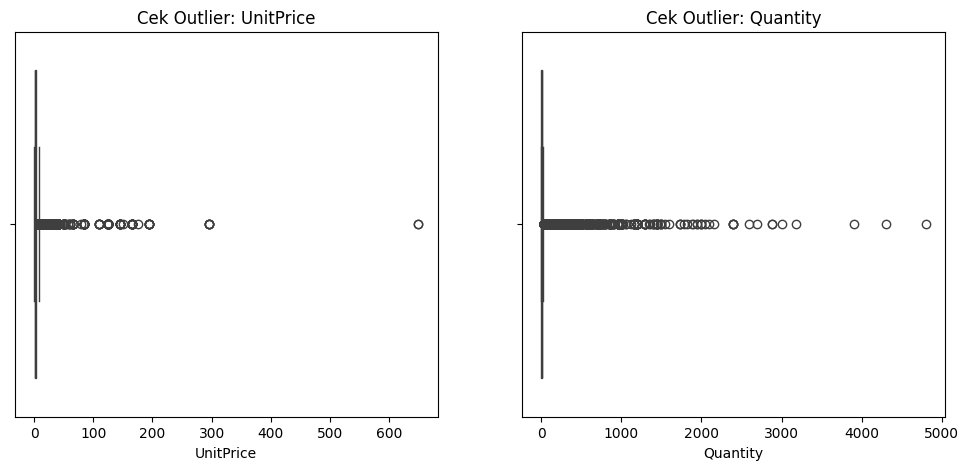

In [34]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=clean_df['UnitPrice'])
plt.title('Cek Outlier: UnitPrice')

plt.subplot(1, 2, 2)
sns.boxplot(x=clean_df['Quantity'])
plt.title('Cek Outlier: Quantity')

plt.show()

Country
United Kingdom    344502
Germany             8546
France              7901
EIRE                6844
Spain               2388
Netherlands         2312
Belgium             1928
Switzerland         1801
Portugal            1410
Australia           1108
Name: count, dtype: int64


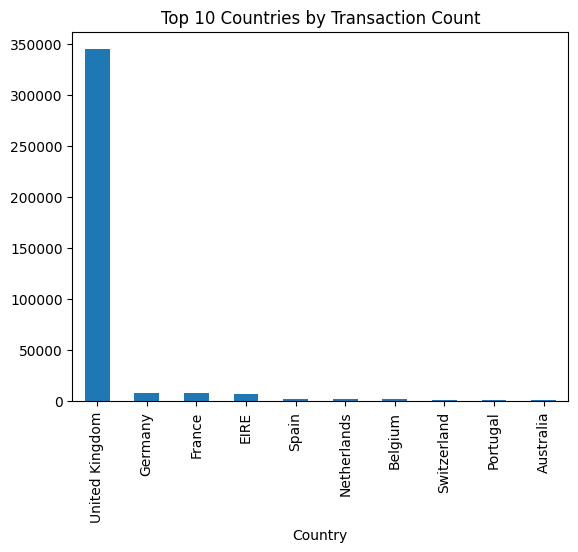

In [35]:
top_countries = clean_df['Country'].value_counts().head(10)
print(top_countries)

top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Transaction Count')
plt.show()

### Bivariate Analysis

In [36]:
df_retail = clean_df[clean_df['Customer_Segment'] == 'Retail']
df_wholesale = clean_df[clean_df['Customer_Segment'] == 'Wholesale']

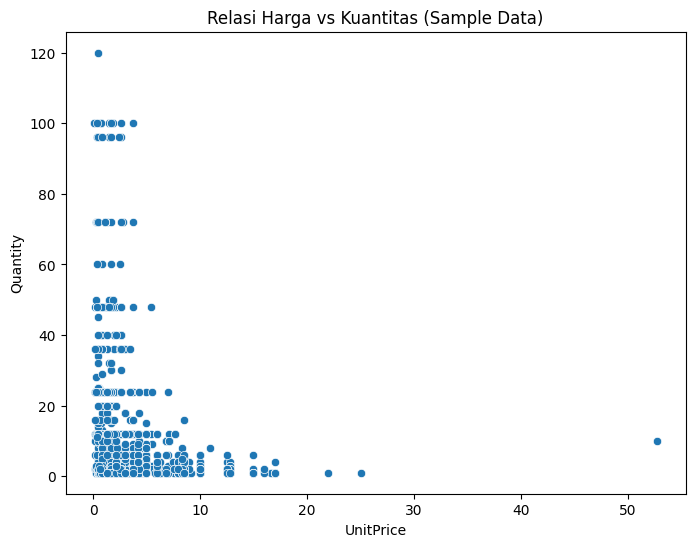

In [37]:
df_sample = df_retail.sample(2000, random_state=42)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_sample, x='UnitPrice', y='Quantity')
plt.title('Relasi Harga vs Kuantitas (Sample Data)')
plt.show()

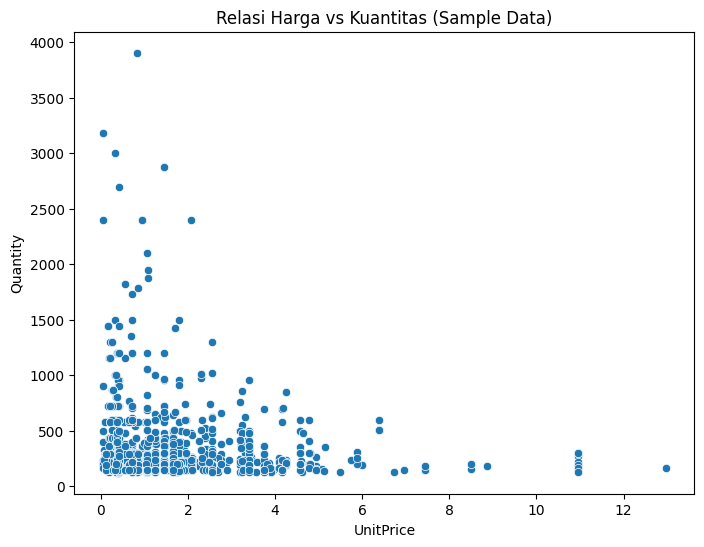

In [38]:
df_sample = df_wholesale.sample(2000, random_state=42)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_sample, x='UnitPrice', y='Quantity')
plt.title('Relasi Harga vs Kuantitas (Sample Data)')
plt.show()

### Time-Series Exploration

In [39]:
print(f"Transaksi Pertama: {clean_df['InvoiceDate'].min()}")
print(f"Transaksi Terakhir: {clean_df['InvoiceDate'].max()}")

Transaksi Pertama: 2010-12-01 08:26:00
Transaksi Terakhir: 2011-12-09 12:50:00


## Visualization & Conclusion

### 1. Which product has highest sales volume, and does that product also generate the highest profit?


 * Retail



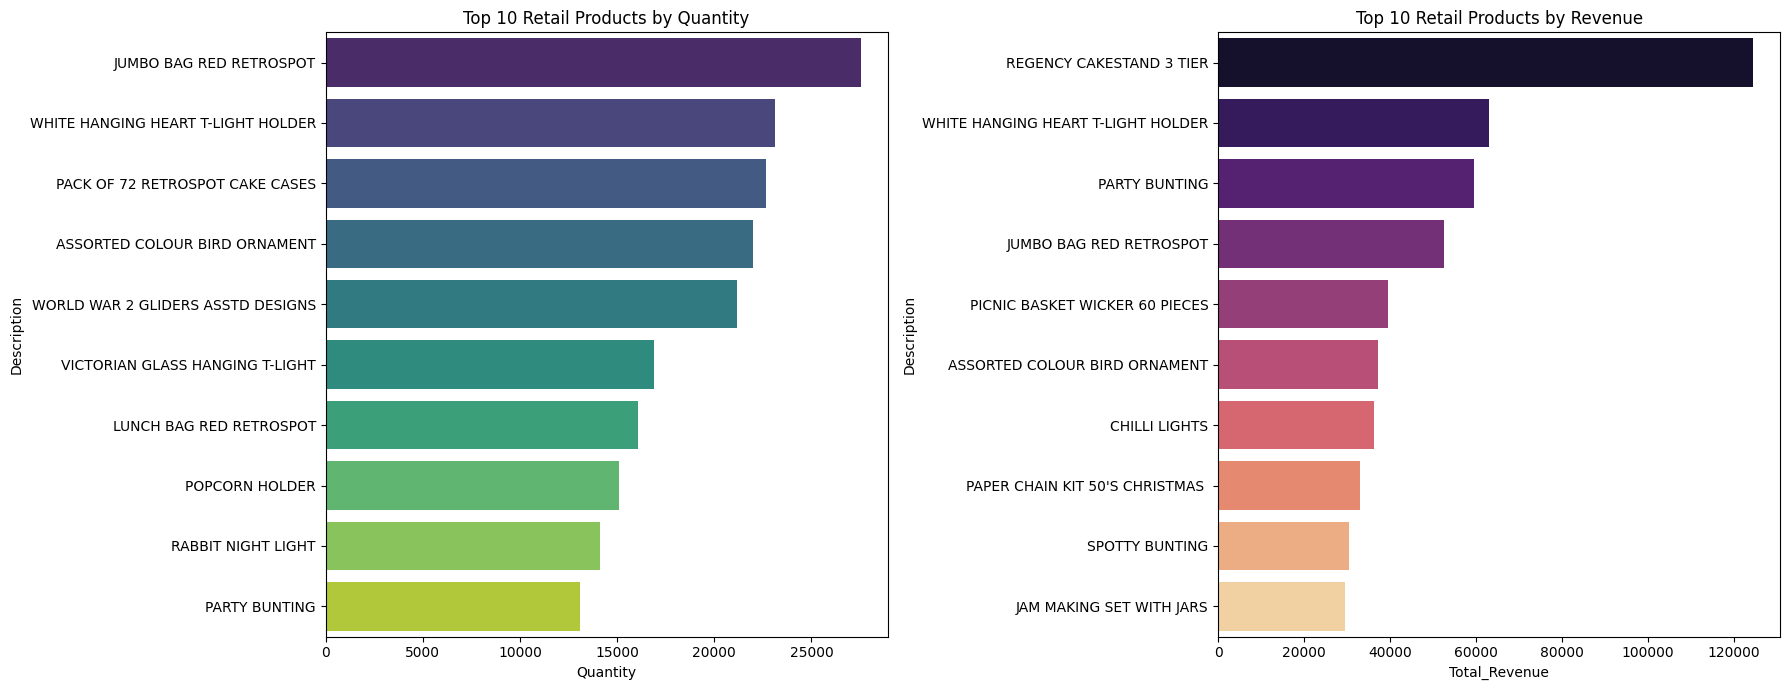

Top 10 Retail Product by Quantity:


,Description,Quantity,Total_Revenue
1751,JUMBO BAG RED RETROSPOT,27535,52604.50
3675,WHITE HANGING HEART T-LIGHT HOLDER,23119,63160.01
2255,PACK OF 72 RETROSPOT CAKE CASES,22678,11681.48
215,ASSORTED COLOUR BIRD ORNAMENT,21989,37149.89
3763,WORLD WAR 2 GLIDERS ASSTD DESIGNS,21151,6168.81
3511,VICTORIAN GLASS HANGING T-LIGHT,16918,23038.20
1932,LUNCH BAG RED RETROSPOT,16076,25683.80
2582,POPCORN HOLDER,15120,12041.32
2636,RABBIT NIGHT LIGHT,14115,26926.64
2330,PARTY BUNTING,13087,59615.43



Top 10 Retail Product by Revenue:


,Description,Quantity,Total_Revenue
2747,REGENCY CAKESTAND 3 TIER,10787,124554.10
3675,WHITE HANGING HEART T-LIGHT HOLDER,23119,63160.01
2330,PARTY BUNTING,13087,59615.43
1751,JUMBO BAG RED RETROSPOT,27535,52604.50
2380,PICNIC BASKET WICKER 60 PIECES,61,39619.50
215,ASSORTED COLOUR BIRD ORNAMENT,21989,37149.89
718,CHILLI LIGHTS,7381,36280.32
2299,PAPER CHAIN KIT 50'S CHRISTMAS,11871,33094.93
3302,SPOTTY BUNTING,6433,30526.35
1718,JAM MAKING SET WITH JARS,7420,29452.52


In [40]:
product_performance_retail = df_retail.groupby('Description').agg({
    'Quantity': 'sum',
    'Total_Revenue': 'sum'
}).reset_index()

top_quantity_retail = product_performance_retail.sort_values('Quantity', ascending=False).head(10)
top_revenue_retail = product_performance_retail.sort_values('Total_Revenue', ascending=False).head(10)

fig_retail, axes_retail = plt.subplots(1, 2, figsize=(18, 7))
sns.barplot(data=top_quantity_retail, x='Quantity', y='Description', ax=axes_retail[0], palette='viridis', hue='Description', legend=False)
axes_retail[0].set_title('Top 10 Retail Products by Quantity')
sns.barplot(data=top_revenue_retail, x='Total_Revenue', y='Description', ax=axes_retail[1], palette='magma', hue='Description', legend=False)
axes_retail[1].set_title('Top 10 Retail Products by Revenue')
plt.tight_layout()
plt.show()

print("Top 10 Retail Product by Quantity:")
display(top_quantity_retail)
print("\nTop 10 Retail Product by Revenue:")
display(top_revenue_retail)

* Wholesale

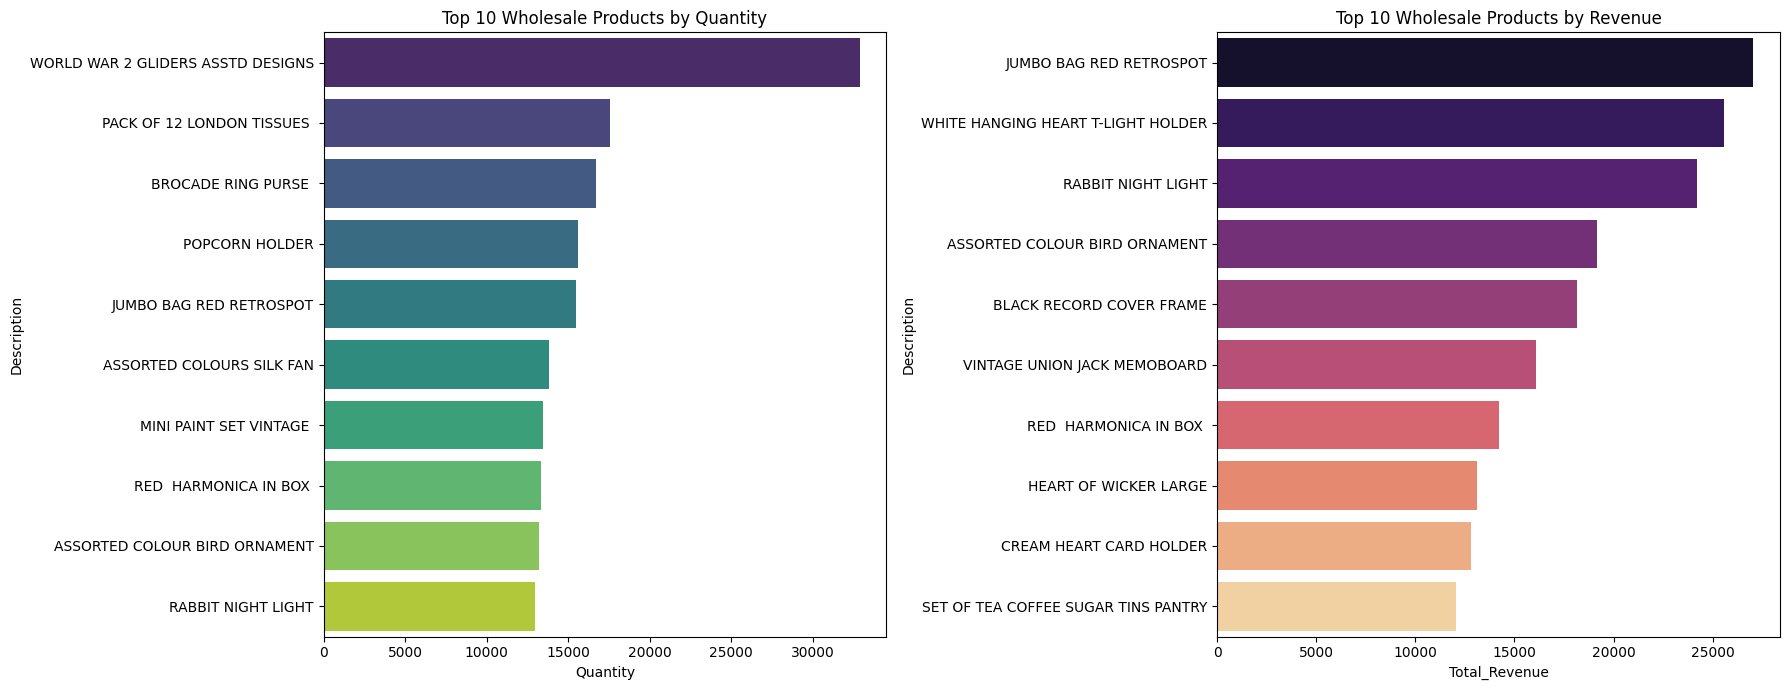

Top 10 Wholesale Product by Quantity:


,Description,Quantity,Total_Revenue
1019,WORLD WAR 2 GLIDERS ASSTD DESIGNS,32880,7306.08
591,PACK OF 12 LONDON TISSUES,17556,4762.20
130,BROCADE RING PURSE,16716,3959.16
695,POPCORN HOLDER,15592,11226.24
449,JUMBO BAG RED RETROSPOT,15470,27045.30
66,ASSORTED COLOURS SILK FAN,13844,9739.32
555,MINI PAINT SET VINTAGE,13490,7865.90
717,RED HARMONICA IN BOX,13360,14207.20
63,ASSORTED COLOUR BIRD ORNAMENT,13208,19151.60
706,RABBIT NIGHT LIGHT,12972,24187.32



Top 10 Wholesale Product by Revenue:


,Description,Quantity,Total_Revenue
449,JUMBO BAG RED RETROSPOT,15470,27045.30
997,WHITE HANGING HEART T-LIGHT HOLDER,8948,25580.54
706,RABBIT NIGHT LIGHT,12972,24187.32
63,ASSORTED COLOUR BIRD ORNAMENT,13208,19151.60
107,BLACK RECORD COVER FRAME,5352,18143.28
982,VINTAGE UNION JACK MEMOBOARD,2520,16081.68
717,RED HARMONICA IN BOX,13360,14207.20
399,HEART OF WICKER LARGE,4180,13132.22
220,CREAM HEART CARD HOLDER,5400,12828.60
845,SET OF TEA COFFEE SUGAR TINS PANTRY,2511,12029.63


In [41]:
product_performance_wholesale = df_wholesale.groupby('Description').agg({
    'Quantity': 'sum',
    'Total_Revenue': 'sum'
}).reset_index()

top_quantity_wholesale = product_performance_wholesale.sort_values('Quantity', ascending=False).head(10)
top_revenue_wholesale = product_performance_wholesale.sort_values('Total_Revenue', ascending=False).head(10)

fig_wholesale, axes_wholesale = plt.subplots(1, 2, figsize=(18, 7))
sns.barplot(data=top_quantity_wholesale, x='Quantity', y='Description', ax=axes_wholesale[0], palette='viridis', hue='Description', legend=False)
axes_wholesale[0].set_title('Top 10 Wholesale Products by Quantity')
sns.barplot(data=top_revenue_wholesale, x='Total_Revenue', y='Description', ax=axes_wholesale[1], palette='magma', hue='Description', legend=False)
axes_wholesale[1].set_title('Top 10 Wholesale Products by Revenue')
plt.tight_layout()
plt.show()

print("Top 10 Wholesale Product by Quantity:")
display(top_quantity_wholesale)
print("\nTop 10 Wholesale Product by Revenue:")
display(top_revenue_wholesale)

* In the retail category, although the 'Jumbo Bag Red Retrospot' sold the most in terms of quantity, the 'Regency Cakestand 3 Tier' generated the highest revenue.
* In the wholesale category, although the 'World War 2 Gliders Asstd Designs' sold the most in terms of quantity, the 'Jumbo Bag Red Retrospot' generated the highest revenue.

### 2. What are the trend in monthly? Are there any spesific seaseonal pattern that need to be anticipated for stock planning ?

* Monthly Sales Trend

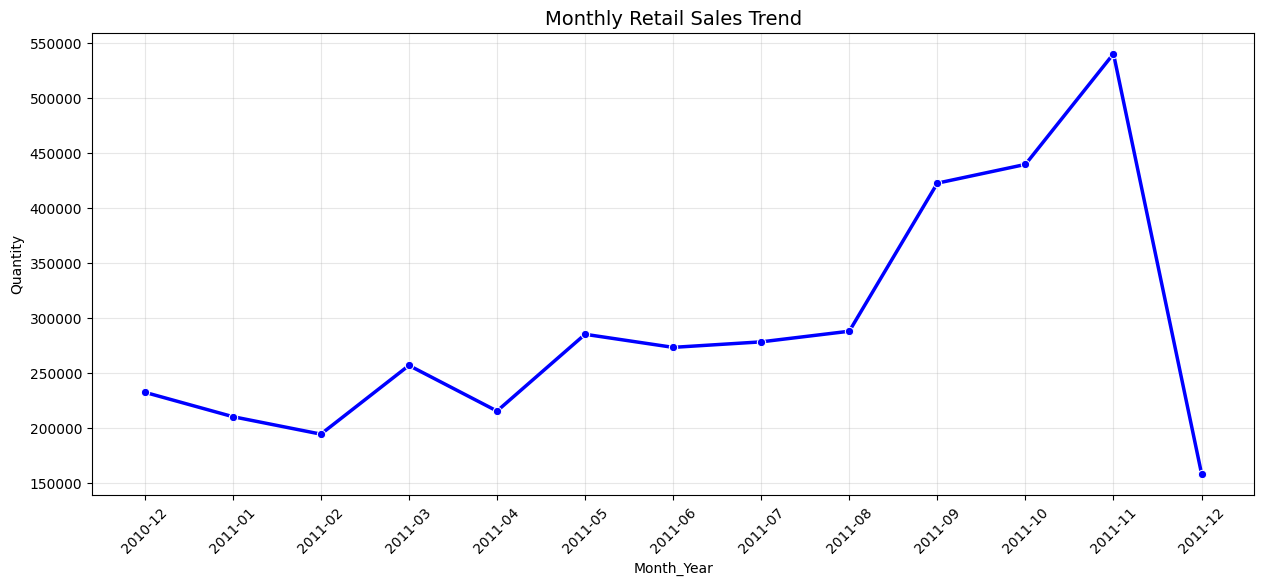

Monthly Retail Sales Trend:


,Month_Year,Quantity
0,2010-12,232292
1,2011-01,210144
2,2011-02,194256
3,2011-03,256677
4,2011-04,215231
5,2011-05,284988
6,2011-06,273110
7,2011-07,278114
8,2011-08,287775
9,2011-09,422308


In [42]:
monthly_retail_trend = df_retail.groupby('Month_Year')['Quantity'].sum().reset_index()
monthly_retail_trend['Month_Year'] = monthly_retail_trend['Month_Year'].astype(str)

plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_retail_trend, x='Month_Year', y='Quantity', marker='o', linewidth=2.5, color='blue')
plt.title('Monthly Retail Sales Trend', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Monthly Retail Sales Trend:")
display(monthly_retail_trend)

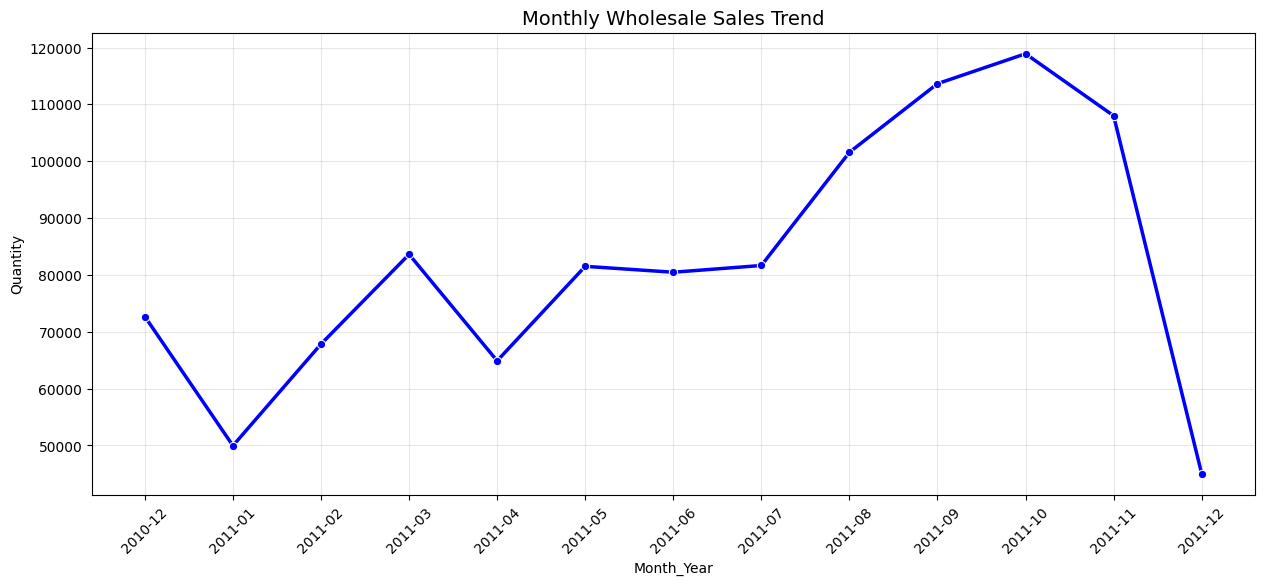

Monthly Wholesale Sales Trend:


,Month_Year,Quantity
0,2010-12,72674
1,2011-01,49959
2,2011-02,67836
3,2011-03,83614
4,2011-04,64892
5,2011-05,81511
6,2011-06,80472
7,2011-07,81659
8,2011-08,101568
9,2011-09,113637


In [43]:
monthly_wholesale_trend = df_wholesale.groupby('Month_Year')['Quantity'].sum().reset_index()
monthly_wholesale_trend['Month_Year'] = monthly_wholesale_trend['Month_Year'].astype(str)

plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_wholesale_trend, x='Month_Year', y='Quantity', marker='o', linewidth=2.5, color='blue')
plt.title('Monthly Wholesale Sales Trend', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Monthly Wholesale Sales Trend:")
display(monthly_wholesale_trend)

* Seasonal Sales Pattern


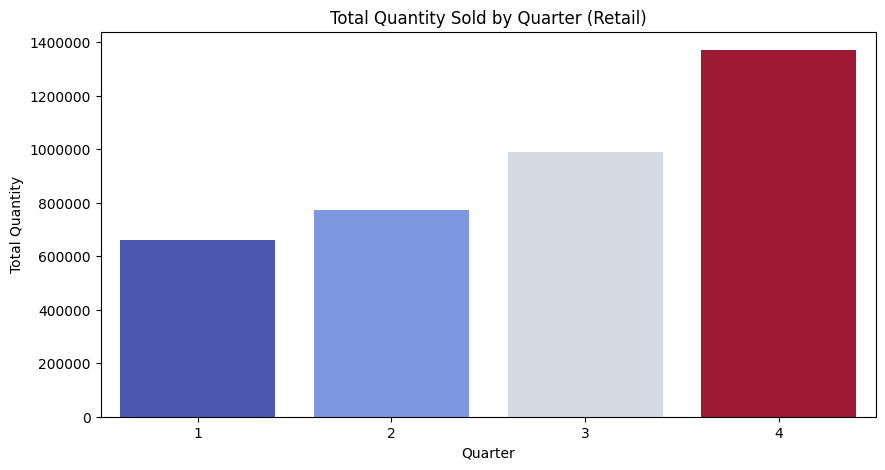

In [44]:
seasonal_retail_pattern = df_retail.groupby('Quarter')['Quantity'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=seasonal_retail_pattern, x='Quarter', y='Quantity', palette='coolwarm', hue='Quantity', legend=False)
plt.title('Total Quantity Sold by Quarter (Retail)')
plt.ylabel('Total Quantity')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

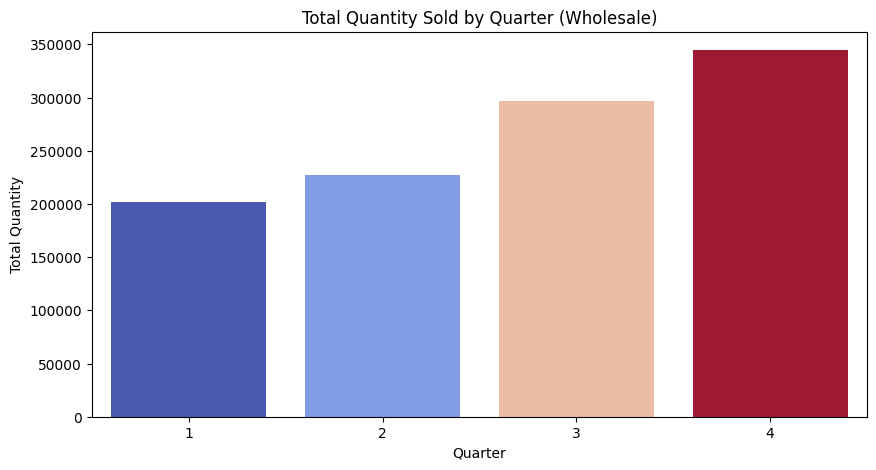

In [45]:
seasonal_wholesale_pattern = df_wholesale.groupby('Quarter')['Quantity'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=seasonal_wholesale_pattern, x='Quarter', y='Quantity', palette='coolwarm', hue='Quantity', legend=False)
plt.title('Total Quantity Sold by Quarter (Wholesale)')
plt.ylabel('Total Quantity')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

* Retail sales were relatively stagnant from January to August or Q1-Q2, but began to soar sharply in September and peaked in November
* Wholesale sales were relatively stagnant from January to July or Q1-Q2, but began to soar sharply in August and peaked in October

### 3. Which region has the worst performance and requires special attention ?

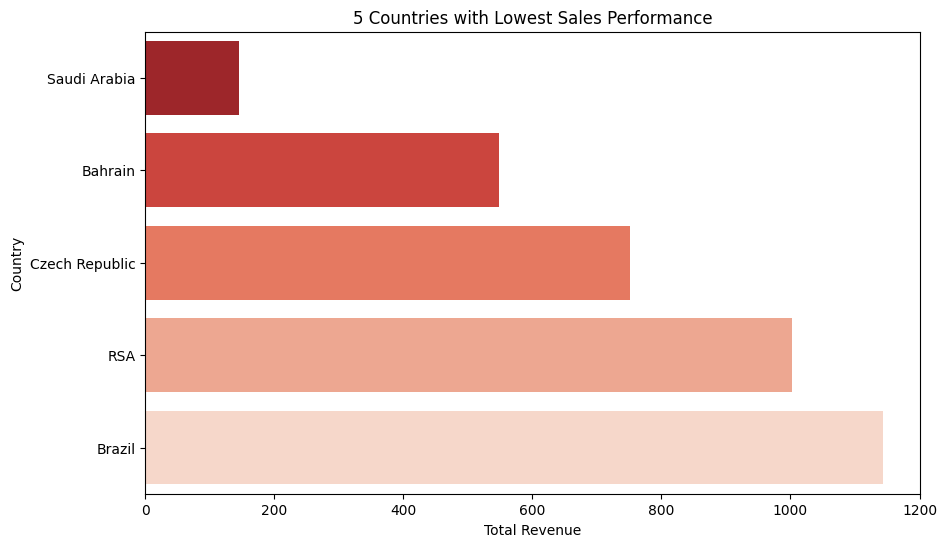

5 Countries with Lowest Sales Performance:


,Country,Total_Revenue
0,Saudi Arabia,145.92
1,Bahrain,548.40
2,Czech Republic,750.98
3,RSA,1002.31
4,Brazil,1143.60


In [46]:
country_perf = clean_df.groupby('Country')['Total_Revenue'].sum().sort_values(ascending=True).reset_index()
bottom_countries = country_perf.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_countries, x='Total_Revenue', y='Country', palette='Reds_r', hue='Country', legend=False)
plt.title('5 Countries with Lowest Sales Performance')
plt.xlabel('Total Revenue')
plt.show()

print(f"5 Countries with Lowest Sales Performance:")
display(bottom_countries)

Saudi Arabia and Bahrain have the lowest total transactions

### Conclusion

1. In the Retail market, although the "Jumbo Bag Red Retrospot" is the main traffic driver, profitability is actually driven by high-value items such as the "Regency Cakestand 3 Tier." On the other hand, in the Wholesale market, the "Jumbo Bag Red Retrospot" actually becomes the largest revenue contributor. Make sure the stock of Jumbo Bags is always safe because this item is crucial for both segments (as a traffic driver in retail and a revenue driver in wholesale).

2. Wholesale demand reacted earlier, starting to rise in August and peaking in October. Retail demand only surged in September and peaked in November. Supply chain management should anticipate stock-building starting in July. Prioritize stock allocation for Wholesale in October, then shift the focus to fulfilling large retail orders in November to maximize the Q4 moment.

3. An evaluation of the cost efficiency of logistics and marketing in the Middle East region is needed. If customer acquisition costs (CAC) and delivery exceed profit margins, it is recommended to stop marketing efforts in this region and redirect resources to strengthen penetration in the more mature European market.